<a href="https://colab.research.google.com/github/ThisaruDissanayake/ML_Model_Practice/blob/main/Studentperfromance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
df =pd.read_csv('./StudentsPerformance.csv')
df.shape


(1000, 8)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

<Axes: xlabel='gender', ylabel='count'>

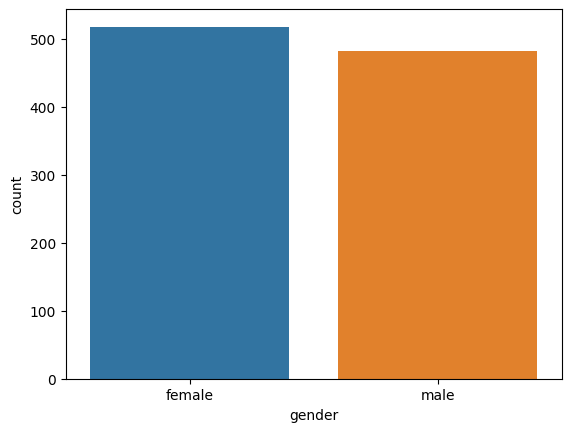

In [11]:
sns.countplot(x='gender',data=df)

<Axes: xlabel='gender', ylabel='count'>

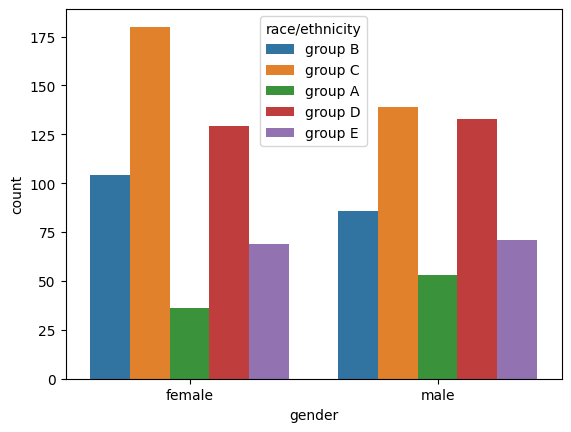

In [12]:
sns.countplot(x='gender',data=df,hue='race/ethnicity')

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['race/ethnicity']=le.fit_transform(df['race/ethnicity'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['lunch']=le.fit_transform(df['lunch'])
df['test preparation course']=le.fit_transform(df['test preparation course'])


df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77
999,0,3,4,0,1,77,86,86


In [21]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77
999,0,3,4,0,1,77,86,86


In [22]:
# y=df['math score']
# x=df['reading score']
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# lr = LinearRegression()
# lr.fit(x_train,y_train)
# y_pred=lr.predict(x_test)
# accuracy= metrics.r2_score(y_test,y_pred)
# print(accuracy)

In [25]:
df2 =pd.read_csv('./StudentsPerformance.csv')
df2.shape

(1000, 8)

In [41]:
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
gend=ohe.fit_transform(df2[['gender']]).toarray()
df_gend=pd.DataFrame(gend,columns=ohe.categories_)

lunch=ohe.fit_transform(df2[['lunch']]).toarray()
lunch=pd.DataFrame(lunch,columns=ohe.categories_)

race=ohe.fit_transform(df2[['race/ethnicity']]).toarray()
df_1=pd.DataFrame(race,columns=ohe.categories_)

df_final=pd.concat([df2,df_gend,lunch,df_1],axis=1)

In [40]:
df_final.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,"(female,)","(male,)","(free/reduced,)","(standard,)","(group A,)","(group B,)","(group C,)","(group D,)","(group E,)"
0,female,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
